In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)
import sys
import matplotlib.pyplot as plt
import sklearn.decomposition as decomp
import sklearn.linear_model as linear_model
import sklearn.datasets as sk_data
from sklearn.preprocessing import StandardScaler
import numpy.linalg as nla
import sklearn.svm as svm
import pandas as pd
from scipy.io import loadmat
from pymatreader import read_mat
#import test-train split
from sklearn.model_selection import train_test_split
#import Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
H=pd.read_csv('/Users/inria/Desktop/M/TwinHouse.csv',sep=';',header=None)
W=pd.read_csv('/Users/inria/Desktop/M/TwinWeather.csv',sep=';',header=None)

In [4]:
# Inputs
Ti2 = H[7];    # temperature in living room at 187 cm (output)
Ti1=H[6];      # temperature in living room at 125 cm
Ti=H[5];     #temperature in living room at 67cm
Tk = H[11];   # kitchen
Td = H[12];   # doorway
Tcr = H[8];    # corridor
Tchl = H[10];  # Children room
Tb=H[13];    #Bed room
Ta = H[3];    # attic
Tg = H[4];    # cellar
Tv = H[29];   # ventilation supply air 
To = W[2];    # outdoor
Qn = W[5];    # Solar radiations from north
Qs = W[7];    # specific global solar vert. South
Qw = W[8];    # specific global solar vert. West
Qi = H[20];   # el. power living
Qk=H[23]+H[24]; #Kithcne power input minus duct losses
Qd=H[25]; #Doorway Heater
QB=H[26]; #Bedroom Heater

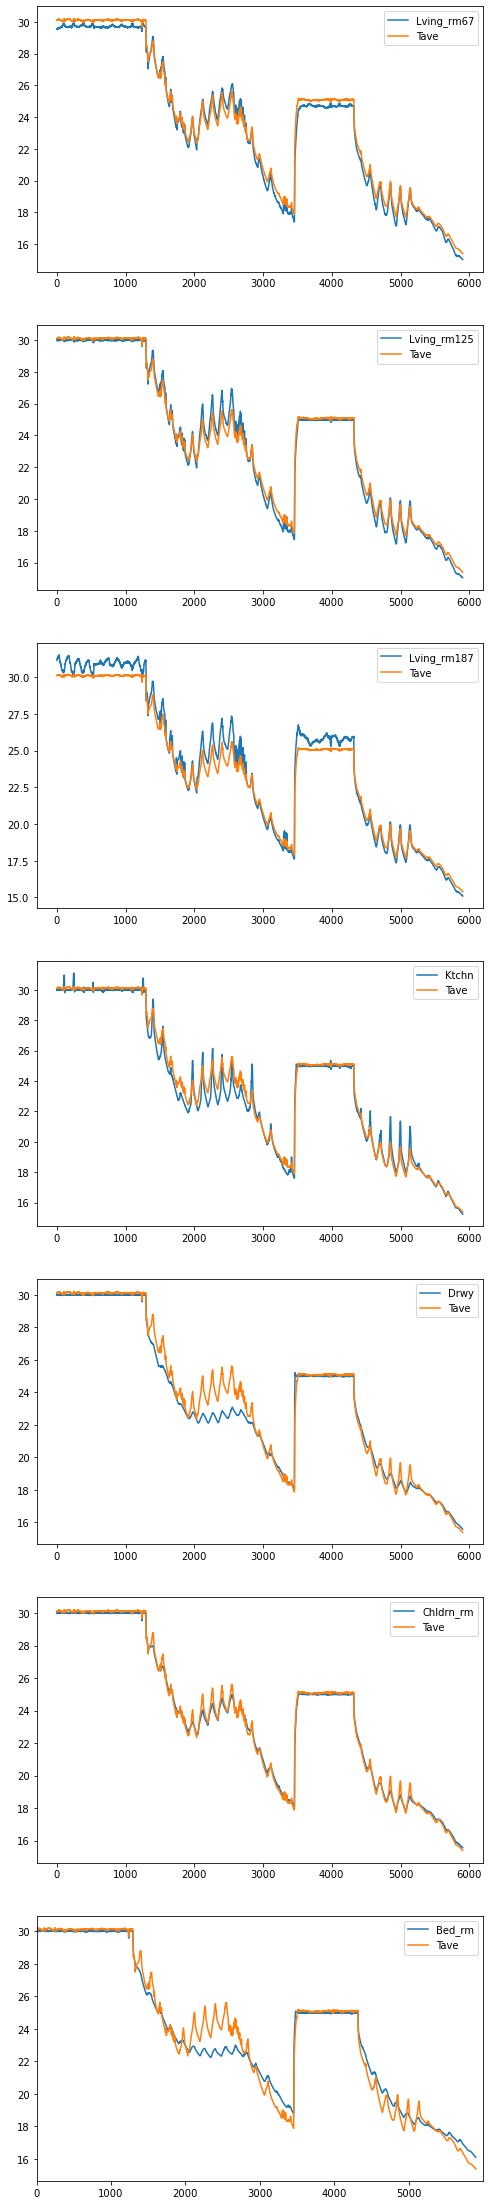

In [6]:
#plt.figure(figsize=(8,20))
fig,ax=plt.subplots(nrows=7,ncols=1,figsize=(8,40))
Tave=(Ti+Ti1+Ti2+Tk+Tcr+Tchl+Tb)/7
lab=['Lving_rm67','Lving_rm125','Lving_rm187','Ktchn','Drwy','Chldrn_rm','Bed_rm']
T=[Ti,Ti1,Ti2,Tk,Td,Tchl,Tb]
for i in range(0,7,1):
#plt.plot(Tave,label='Tav.lvngrm')
    ax[i].plot(T[i],label=lab[i])
    ax[i].plot(Tave,label='Tave')
    ax[i].legend()
    #plt.show()
    #ax[2].plot(abs(Ti),label='livngrm67')
#ax[3].plot(abs(Tk),label='Ktch')
#ax[4].plot(abs(Tchl),label='Chld')
#ax[5].plot(abs(Tb),label='bdrm')
#ax[6].plot(abs(Tcr),label='livngrm_hght67')
#ax[6].plot(Tave,label='Tave')
#plt.plot(Ta,label='Outdr_temp')
plt.xlim(0,6000)
plt.xticks((np.arange(0,6000,1000)))
plt.legend()
plt.show()

#plt.title('The tempeartures recodrded by sensors at different hieghts in the same room')
#plt.savefig('Exp_temp1.png')

#print(sum(abs(Ti-Tave)))

In [9]:
lab[1]

'Lving_rm125'

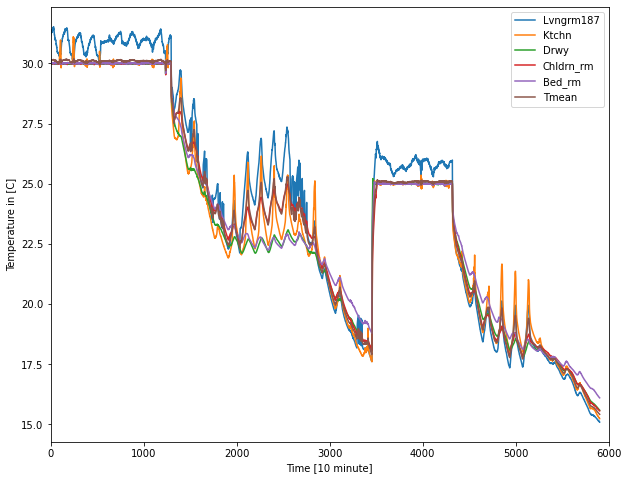

In [7]:
df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tcr,Tchl,Tb]).transpose()
df['14']=df.mean(axis=1)
df.columns=['Lvngrm67','Lvngrm125','Lvngrm187','Ktchn','Drwy','crrdr','Chldrn_rm','Bed_rm','Tmean']

df.plot(y=['Lvngrm187','Ktchn','Drwy','Chldrn_rm','Bed_rm','Tmean'],xlim=(0,6000),figsize=(10,8))
plt.ylabel('Temperature in [C]')
plt.xlabel('Time [10 minute]')
plt.savefig('AverageTemp')
plt.show()

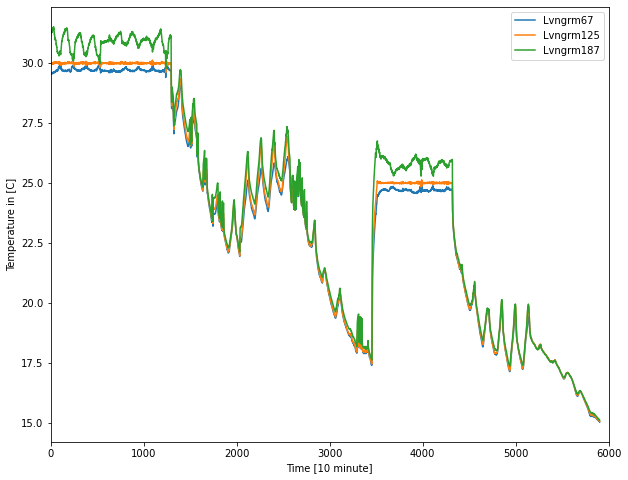

In [8]:
df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tcr,Tchl,Tb]).transpose()
df['14']=df.mean(axis=1)
df.columns=['Lvngrm67','Lvngrm125','Lvngrm187','Ktchn','Drwy','crrdr','Chldrn_rm','Bed_rm','Tmean']

df.plot(y=['Lvngrm67','Lvngrm125','Lvngrm187'],xlim=(0,6000),figsize=(10,8))
plt.ylabel('Temperature in [C]')
plt.xlabel('Time [10 minute]')
plt.savefig('AverageTemp1')
plt.show()

In [9]:
df

,Lvngrm67,Lvngrm125,Lvngrm187,Ktchn,Drwy,crrdr,Chldrn_rm,Bed_rm,Tmean
0,29.531048,29.986008,31.134912,29.986731,30.012228,30.049305,29.997070,30.000942,30.087281
1,29.547962,30.000132,31.157990,29.994390,29.999079,30.057949,30.006847,29.998449,30.095350
2,29.546320,29.972891,31.184851,30.008350,29.985352,30.067911,30.002213,30.000271,30.096020
3,29.556202,29.984280,31.223591,29.993240,30.002310,30.070709,30.000031,30.006247,30.104576
4,29.553158,29.997700,31.257040,30.005650,30.023932,30.071751,30.007252,30.000439,30.114615
...,...,...,...,...,...,...,...,...,...
5900,15.052640,15.071091,15.117129,15.262601,15.604040,15.695460,15.581810,16.120953,15.438216
5901,15.049970,15.061041,15.116321,15.260260,15.601132,15.693260,15.573151,16.118481,15.434202
5902,15.031240,15.060422,15.117849,15.256880,15.598860,15.690831,15.571490,16.113010,15.430073
5903,15.033789,15.054210,15.108339,15.253000,15.593478,15.687030,15.560300,16.107492,15.424705


In [10]:
# We create categories for Hot, Cold and Normal temperatures
category=pd.cut(df,bins=[0,16,28,32],labels=['Cold','Normal','TooHot'])
#Insert the new category at 4th column
df.insert(9,'TEMP',category)
df

ValueError: Input array must be 1 dimensional

In [11]:
df.insert(9,'TEMP',np.arange(0,df.shape[0],1))

In [12]:

for i in np.arange(0,df.shape[0],1):
    if any((0<df.iloc[i,:8])&(df.iloc[i,:8]<=26))==True:
        df.iloc[i,9]='Normal'
    if any((26<df.iloc[i,:8])&(df.iloc[i,:8]<30))==True:
        df.iloc[i,9]='Hot'
    if any(30<=(df.iloc[i,:8]))==True:
        df.iloc[i,9]='TooHot'
    


In [13]:
df1

NameError: name 'df1' is not defined

In [14]:
import collections
counter=collections.Counter(df.iloc[:,9])
counter

Counter({'TooHot': 1297, 'Hot': 675, 'Normal': 3933})

In [15]:
df

,Lvngrm67,Lvngrm125,Lvngrm187,Ktchn,Drwy,crrdr,Chldrn_rm,Bed_rm,Tmean,TEMP
0,29.531048,29.986008,31.134912,29.986731,30.012228,30.049305,29.997070,30.000942,30.087281,TooHot
1,29.547962,30.000132,31.157990,29.994390,29.999079,30.057949,30.006847,29.998449,30.095350,TooHot
2,29.546320,29.972891,31.184851,30.008350,29.985352,30.067911,30.002213,30.000271,30.096020,TooHot
3,29.556202,29.984280,31.223591,29.993240,30.002310,30.070709,30.000031,30.006247,30.104576,TooHot
4,29.553158,29.997700,31.257040,30.005650,30.023932,30.071751,30.007252,30.000439,30.114615,TooHot
...,...,...,...,...,...,...,...,...,...,...
5900,15.052640,15.071091,15.117129,15.262601,15.604040,15.695460,15.581810,16.120953,15.438216,Normal
5901,15.049970,15.061041,15.116321,15.260260,15.601132,15.693260,15.573151,16.118481,15.434202,Normal
5902,15.031240,15.060422,15.117849,15.256880,15.598860,15.690831,15.571490,16.113010,15.430073,Normal
5903,15.033789,15.054210,15.108339,15.253000,15.593478,15.687030,15.560300,16.107492,15.424705,Normal


In [16]:
#Reduce the number of sensors
results_all=[]
y=str(df.iloc[0,6])
# An array equal to the reducing number of digits after decimal
y=np.array(range(y[::-1].find('.'),2,-1))
for z in y:
    df.iloc[:,:9].round(z)
    results_samp=[]
    #change the sampling rate
    for i in np.array(range(df.shape[0],1000,-24*6*10)):
        df1=df.sample(i)
        results_sns=[]
        #Reduce the number of sensors
        for c in np.array(range(1,df1.shape[1]-1,1)):
            #X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,:c],df1.TEMP,test_size=0.4,random_state=101)
            X_train=np.array(df1.iloc[:,:c])
            y_train=df1.TEMP
            y_test=df.TEMP
            X_test=np.array(df.iloc[:,:c])
            #Apply fitting of the data
            logmodel=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=10000)
            result=logmodel.fit(X_train,y_train)
            #Predict the new values
            predictions=logmodel.predict(X_test)
            results_sns.append(metrics.f1_score(y_test,predictions,average=None)[0])
        results_samp.append(results_sns)
    results_all.append(results_samp) 

In [17]:
results_all

[[[0.7879310344827586,
   0.8098471986417657,
   0.9429892141756548,
   0.9524539877300614,
   0.9506933744221879,
   0.9539877300613497,
   0.9515757109915449,
   0.953184957789716],
  [0.780952380952381,
   0.8155668358714044,
   0.9356089992242048,
   0.9393468118195957,
   0.9426356589147287,
   0.9499615088529638,
   0.9484218629715165,
   0.9499615088529638],
  [0.7794245858761988,
   0.8170940170940172,
   0.921383647798742,
   0.9277864992150706,
   0.9310344827586208,
   0.9285153181461115,
   0.9311424100156496,
   0.9303054032889585],
  [0.7688266199649737,
   0.8057921635434413,
   0.9141055949566588,
   0.9118110236220471,
   0.917517674783975,
   0.917517674783975,
   0.9169278996865203,
   0.918622848200313]],
 [[0.7879310344827586,
   0.8098471986417657,
   0.9429892141756548,
   0.9516500383729855,
   0.9498843484965305,
   0.9539877300613497,
   0.9523809523809523,
   0.953184957789716],
  [0.7815491731940819,
   0.8126064735945485,
   0.9297971918876755,
   0.9345794

In [18]:
rs=pd.DataFrame(results_all)
rs

,0,1,2,3
0,"[0.7879310344827586, 0.8098471986417657, 0.942...","[0.780952380952381, 0.8155668358714044, 0.9356...","[0.7794245858761988, 0.8170940170940172, 0.921...","[0.7688266199649737, 0.8057921635434413, 0.914..."
1,"[0.7879310344827586, 0.8098471986417657, 0.942...","[0.7815491731940819, 0.8126064735945485, 0.929...","[0.7772925764192139, 0.8112244897959183, 0.925...","[0.7717484926787251, 0.8088360237892949, 0.913..."
2,"[0.7879310344827586, 0.8098471986417657, 0.942...","[0.782608695652174, 0.8142493638676845, 0.9421...","[0.7761194029850746, 0.8055077452667815, 0.925...","[0.7708516242317823, 0.7944492627927147, 0.934..."


In [19]:
x=np.array(results_all)
index=pd.MultiIndex.from_product([range(s) for s in x.shape],names=['X','Y','Z'])
rs = pd.DataFrame({'x': x.flatten()}, index=index)['x']
rs = rs.unstack(level='X').swaplevel().sort_index()
rs.columns = ['Comp_1', 'Comp_2', 'Comp_3']
rs.index.names = ['Sensors','Sampling Rate']
rs.index.set_levels([ 
                       ['1','2','3','4','5','6','7','8'],['5905','4465','3025','1585']], inplace=True)


/var/folders/0b/f9crck810477r2yg4k9mg_dc0000gp/T/ipykernel_2673/4112507617.py:7: FutureWarning: inplace is deprecated and will be removed in a future version.
  rs.index.set_levels([


In [20]:
rs

Comp_1    Comp_2    Comp_3
Sensors Sampling Rate                              
1       5905           0.787931  0.787931  0.787931
        4465           0.780952  0.781549  0.782609
        3025           0.779425  0.777293  0.776119
        1585           0.768827  0.771748  0.770852
2       5905           0.809847  0.809847  0.809847
        4465           0.815567  0.812606  0.814249
        3025           0.817094  0.811224  0.805508
        1585           0.805792  0.808836  0.794449
3       5905           0.942989  0.942989  0.942989
        4465           0.935609  0.929797  0.942174
        3025           0.921384  0.925117  0.925256
        1585           0.914106  0.913793  0.934066
4       5905           0.952454  0.951650  0.952454
        4465           0.939347  0.934579  0.951724
        3025           0.927786  0.931250  0.928515
        1585           0.911811  0.916928  0.927786
5       5905           0.950693  0.949884  0.954789
        4465           0.942636  0.935308  0.952381
        3025           0.931034  0.933646  0.929356
        1585           0.917518  0.928237  0.932602
6       5905           0.953988  0.953988  0.957187
        4465           0.949962  0.936137  0.957187
        3025           0.928515  0.940264  0.927559
        1585           0.917518  0.922475  0.934272
7       5905           0.951576  0.952381  0.952381
        4465           0.948422  0.940994  0.951650
        3025           0.931142  0.943542  0.929356
        1585           0.916928  0.926562  0.935937
8       5905           0.953185  0.953185  0.952381
        4465           0.949962  0.941815  0.951650
        3025           0.930305  0.943542  0.928515
        1585           0.918623  0.927400  0.936768

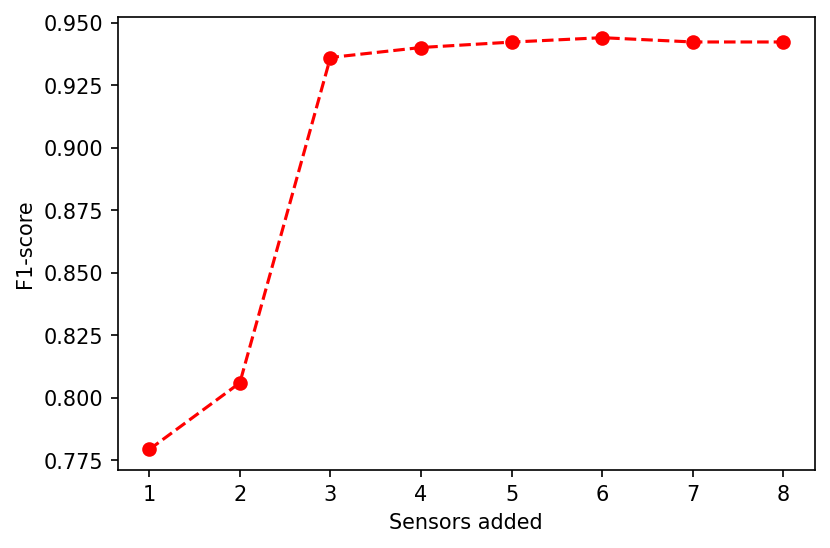

In [21]:
fig,axes=plt.subplots(dpi=150)
axes.plot(rs.groupby('Sensors').mean().index,rs.groupby('Sensors').mean().Comp_3,linestyle='dashed',marker='o',color='r')
#plt.xticks(rotation=30)
plt.ylabel('F1-score')
plt.xlabel('Sensors added')
plt.savefig('sensors2.png')
plt.show()


In [24]:
rs.groupby('Sampling Rate').mean().round(3)

,Comp_1,Comp_2,Comp_3
Sampling Rate,,,
5905,0.913,0.913,0.914
4465,0.908,0.902,0.913
3025,0.896,0.901,0.894
1585,0.884,0.889,0.896


In [14]:
rs.groupby('Sensors').mean()

,Comp_1,Comp_2,Comp_3
Sensors,,,
1,0.777588,0.761910,0.771389
2,0.800447,0.797406,0.806672
3,0.907934,0.929808,0.912540
4,0.917155,0.931660,0.913145
5,0.918463,0.935584,0.919959
6,0.913089,0.938784,0.919698
7,0.919034,0.941794,0.923907
8,0.918603,0.938559,0.923381


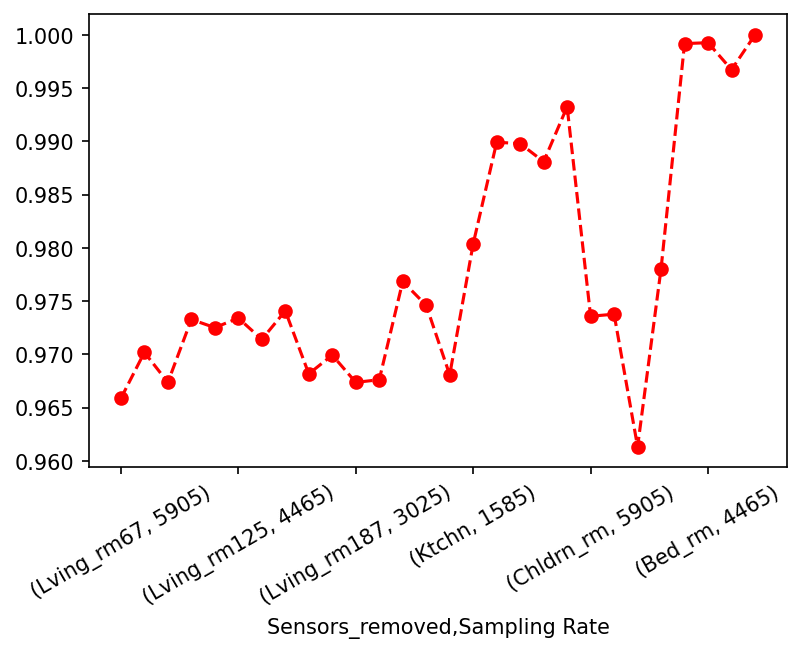

In [167]:
plt.figure(dpi=150)
rs.Comp_1.plot(linestyle='dashed',marker='o',color='red')
plt.xticks(rotation=30)
plt.show()

In [90]:
rs.iloc[:,0]

Sensors_removed  Sampling Rate
Lving_rm67       5905             0.973075
                 4465             0.974543
                 3025             0.965746
                 1585             0.958971
Lving_rm125      5905             0.981939
                 4465             0.981207
                 3025             0.983200
                 1585             0.973868
Lving_rm167      5905             0.968782
                 4465             0.964401
                 3025             0.960633
                 1585             0.954044
Ktchn            5905             0.973317
                 4465             0.973017
                 3025             0.975734
                 1585             0.971470
Drwy             5905             0.989494
                 4465             0.989899
                 3025             0.991119
                 1585             0.984347
Chldrn_rm        5905             0.974480
                 4465             0.974526
                 3025  